<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

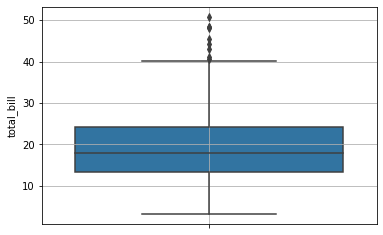

In [3]:
sns.boxplot(y='total_bill', data=tips)
plt.grid()
plt.show()

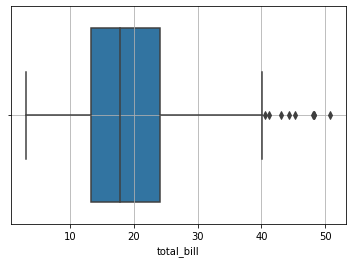

In [4]:
sns.boxplot(x='total_bill', data=tips)
plt.grid()
plt.show()

성별 tip의 box plot

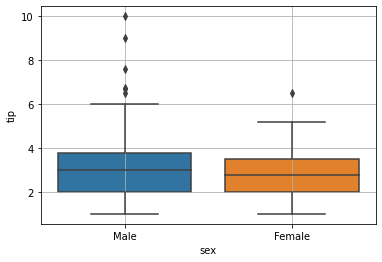

In [5]:
sns.boxplot(x='sex', y='tip', data=tips)
plt.grid()
plt.show()

In [6]:
tips[tips.sex == 'Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [7]:
tips[tips.sex == 'Female'].tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

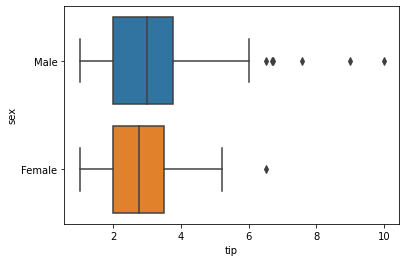

In [8]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

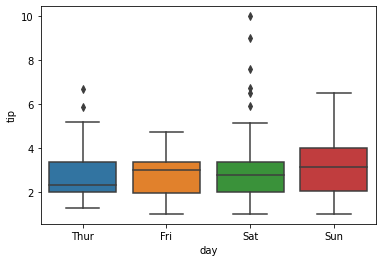

In [9]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

Subplot을 생성해서 각각 그래프 그리기

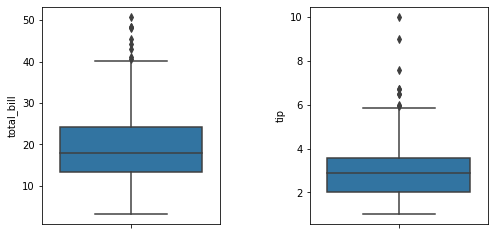

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(y='total_bill', data=tips, ax=ax[0])
sns.boxplot(y='tip', data=tips, ax=ax[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

2개의 Subplot에 흡연여부별 tip, 시간별 tip의 box plot

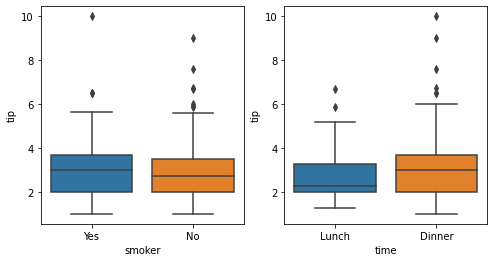

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

 total_bill 히스토그램을 세로 막대로 표현

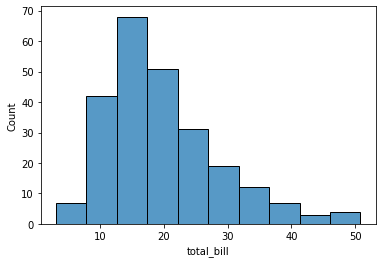

In [12]:
sns.histplot(x='total_bill', data=tips, bins=10)
plt.show()

total_bill 히스토그램을 가로 막대로 표현

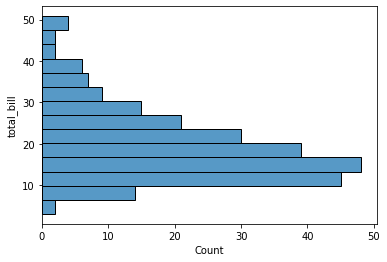

In [13]:
sns.histplot(y='total_bill', data=tips)
plt.show()

*   Subplot 2개를 상/하로 생성.
*   위쪽 Subplot에는 tip의 box plot을 가로 방향으로 그림.
*   아래쪽 Subplot에는 tip의 히스토그램을 그림.

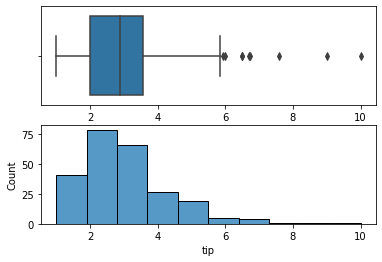

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.boxplot(x='tip', data=tips, ax=ax[0])
sns.histplot(x='tip', data=tips, ax=ax[1], bins=10)

plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수(컬럼)의 빈도수(count, frequency)를 막대로 표현한 그래프

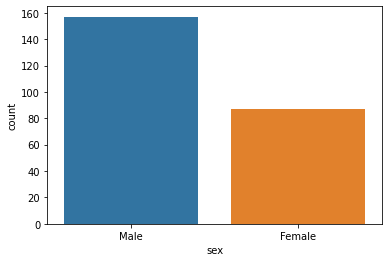

In [15]:
# 성별 빈도수
sns.countplot(x='sex', data=tips)
plt.show()

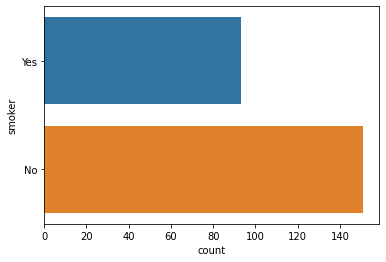

In [16]:
# 흡연자/비흡연자 수 가로 막대 그래프
sns.countplot(y='smoker', data=tips)
plt.show()

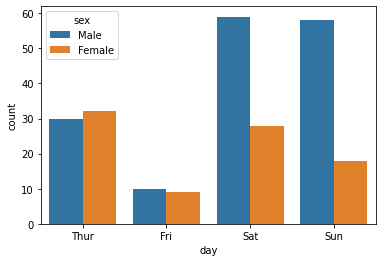

In [22]:
# 요일별 성별 빈도수
sns.countplot(x='day', hue='sex', data=tips)
# hue 파라미터: 카테고리 별로 색깔을 다르게 시각화할 때
plt.show()

In [18]:
tips[tips['day'] == 'Thur']['sex'].value_counts()
# tips[tips.day == 'Thur'].sex.value_counts()

Female    32
Male      30
Name: sex, dtype: int64

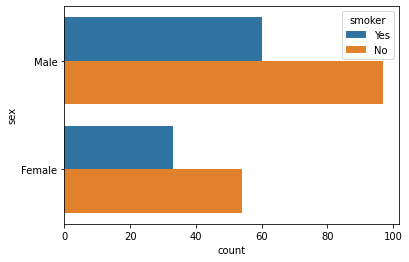

In [23]:
# 성별 흡연/비흡연자 수 가로 막대 그래프
sns.countplot(y='sex', hue='smoker', data=tips)
plt.show()

In [24]:
# 남성 흡연/비흡연자 수
tips[tips['sex'] == 'Male']['smoker'].value_counts()

No     97
Yes    60
Name: smoker, dtype: int64

## `barplot()`

*   그룹별 변수(컬럼)의 기술 통계량(평균, 중앙값, 최댓값, ...)을 막대로 시각화.
*   카테고리 타입 변수와 연속형 변수의 통계량을 함께 시각화.

In [26]:
# 남성 tip의 평균
tips[tips['sex'] == 'Male']['tip'].mean()

3.0896178343949052

In [28]:
# 여성 tip의 평균
tips[tips.sex == 'Female'].tip.mean()

2.833448275862069

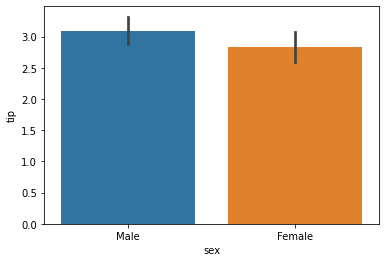

In [29]:
sns.barplot(x='sex', y='tip', data=tips)
# estimator 파라미터: 연속형 변수의 통계량을 계산할 함수를 지정. 기본값은 mean 함수.
plt.show()

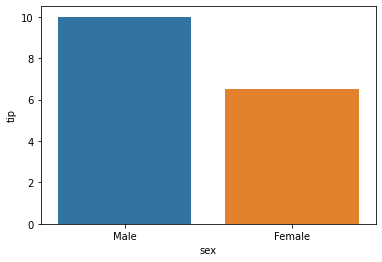

In [34]:
# 성별 tip의 최댓값
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max, ci=None)
# ci 파라미터: confidence interval(신뢰구간). 기본값은 'sd'.
plt.show()

In [31]:
tips[tips['sex'] == 'Male']['tip'].max()

10.0

In [32]:
tips[tips.sex == 'Female'].tip.max()

6.5

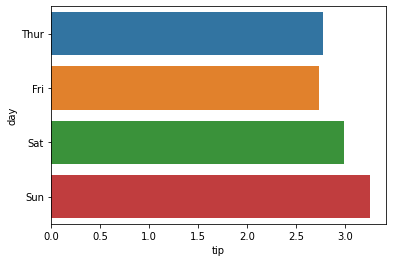

In [36]:
# 요일별 tip의 평균 가로 막대 그래프
sns.barplot(x='tip', y='day', data=tips, ci=None)
plt.show()

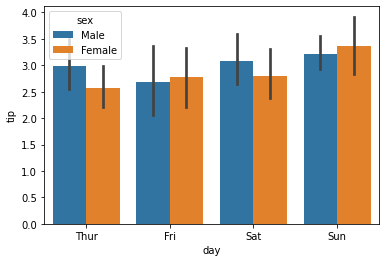

In [37]:
# 요일별 성별 tip의 평균 세로 막대 그래프
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

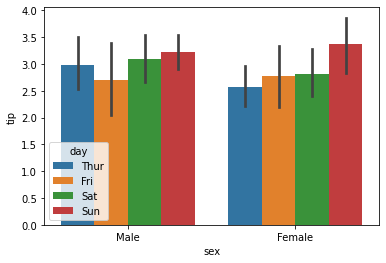

In [38]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()

# 산점도(Scatter plot)

## `scatterplot()`

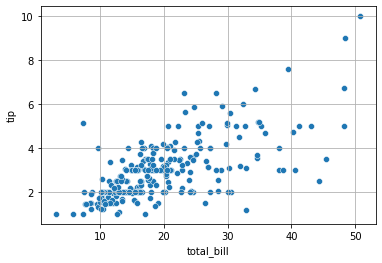

In [40]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀 직선

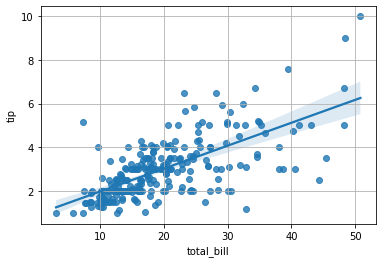

In [41]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `jointplot()`

joint plot: 산점도 + 히스토그램

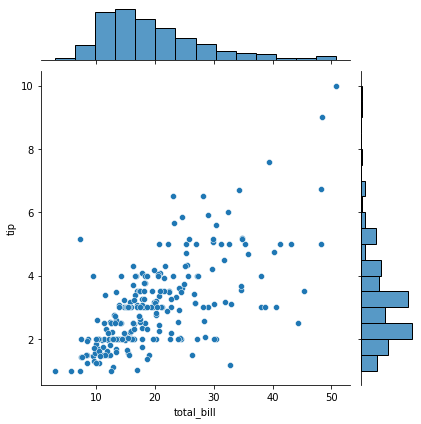

In [44]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

tip ~ total_bill 산점도. marker의 색깔을 성별에 따라 다르게 시각화.

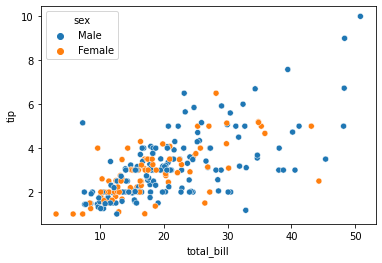

In [45]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.show()

tip ~ total_bill 산점도. marker의 색깔은 성별에 따라서, marker의 크기를 인원수에 따라서 다르게 시각화.

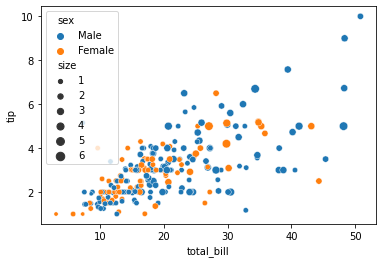

In [46]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', data=tips)
plt.show()

tip ~ total_bill 산점도. marker 색깔은 성별에 따라서, marker 모양을 흡연여부에 따라서 다르게 시각화.

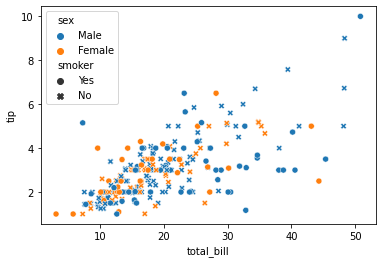

In [49]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='smoker', data=tips)
plt.show()

# Line plot(선 그래프)

In [50]:
np.random.seed(1)
df = pd.DataFrame({'x1': np.arange(1, 11),
                   'x2': np.random.rand(10)})
df

,x1,x2
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


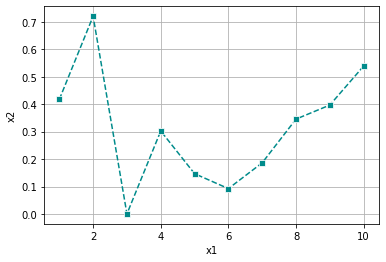

In [65]:
sns.lineplot(x='x1', y='x2', data=df, marker='s', linestyle='--', color='#008b8b')
plt.grid()
plt.show()

# Category plot

카테고리 별로 Subplot을 생성하고 통계값(평균, 중앙값, ...)을 계산해서, 모든 Subplot에 같은 종류의 그래프들을 시각화하는 방법.

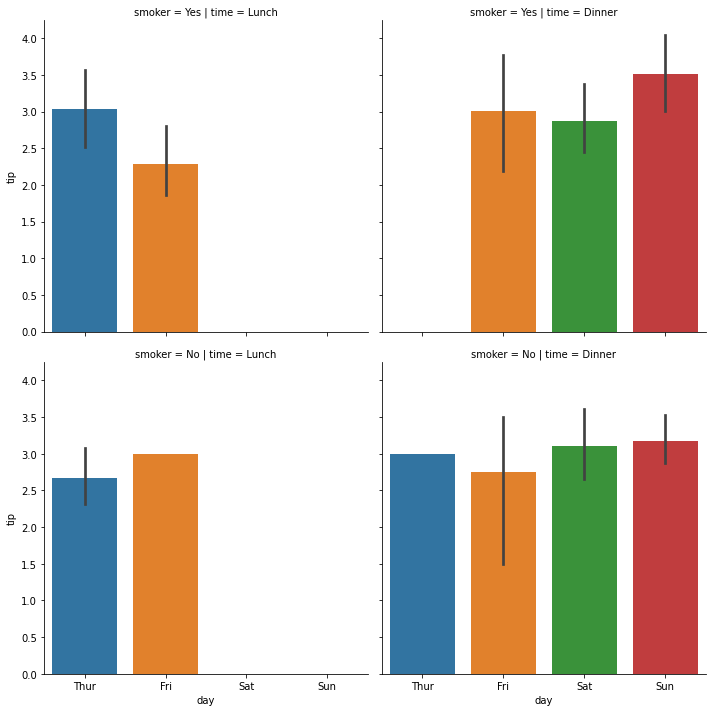

In [66]:
# 요일(x축)별 tip(y축)의 평균을 막대 그래프(그래프 종류)로 시각화.
# 흡연 여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
sns.catplot(x='day', y='tip', data=tips,
            kind='bar',         # kind=그래프 종류(bar, box, strip, count, ...)
            estimator=np.mean,  # estimator=통계 계산 함수. 기본값은 np.mean.
            row='smoker',       # row=subplot의 행을 나눌 기준이 되는 카테고리 변수(컬럼)
            col='time')         # col=subplot의 열을 나눌 기준이 되는 카테고리 변수(컬럼)
plt.show()

In [68]:
# 흡연자 점심 시간 목요일의 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Thur')].tip.mean()

3.0299999999999994

In [69]:
# 흡연자 점심 시간 금요일의 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Fri')].tip.mean()

2.28

In [70]:
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Sat')]

,total_bill,tip,sex,smoker,day,time,size


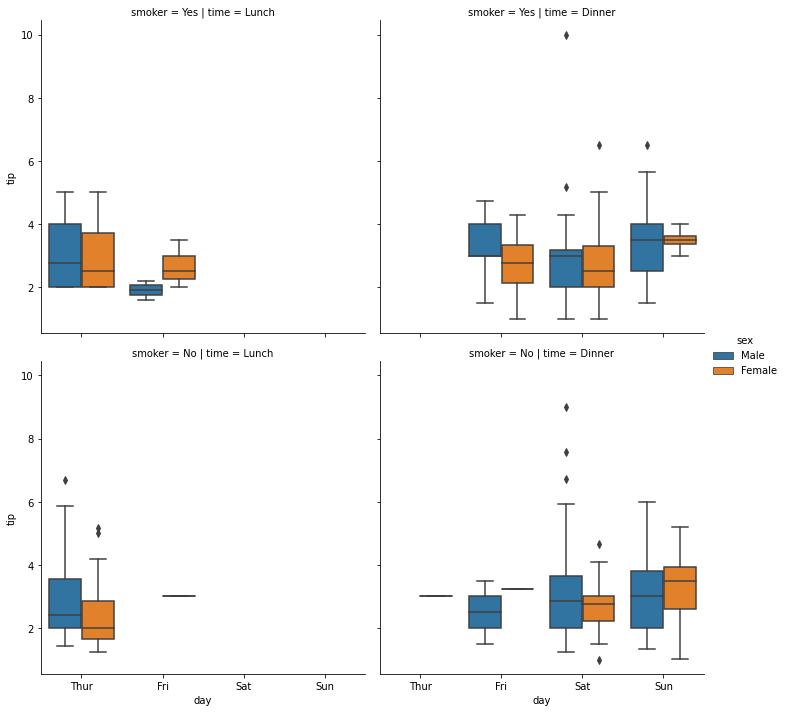

In [71]:
# 요일(x축)별 tip(y축)의 평균을 box plot(그래프 종류)로 시각화.
# 흡연 여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
# 막대의 색깔을 성별에 따라서 다르게 시각화.
sns.catplot(x='day', y='tip', data=tips,
            kind='box', row='smoker', col='time', hue='sex')
plt.show()

# Exercise: iris 데이터 셋

*   seaborn 패키지의 예제 데이터 셋 'iris'를 DataFrame으로 생성.
*   데이터 프레임을 탐색 - 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수의 빈도수
*   품종별로 Subplot을 생성해서, 모든 숫자 타입 변수의 box plot을 시각화.
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화.
*   모든 연속형 변수들 간의 상관 관계를 시각화 - Pair plot

## 데이터 셋 준비

In [72]:
iris = sns.load_dataset('iris')

## 데이터 셋 탐색

In [73]:
iris.head()  # iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris.tail()  # iris.iloc[-5:]

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [75]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Box plot

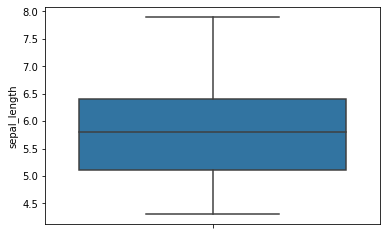

In [81]:
sns.boxplot(y='sepal_length', data=iris)
plt.show()

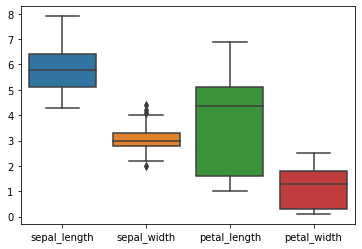

In [82]:
sns.boxplot(data=iris)
plt.show()

## Category plot

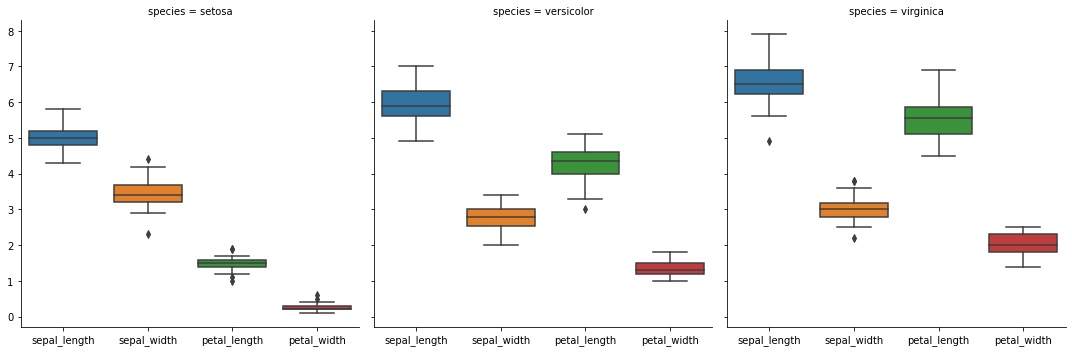

In [83]:
sns.catplot(data=iris, kind='box', col='species')
plt.show()

## Scatter plot

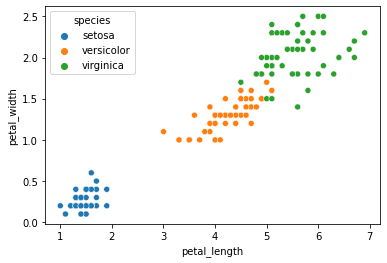

In [84]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')
plt.show()

## Pair plot

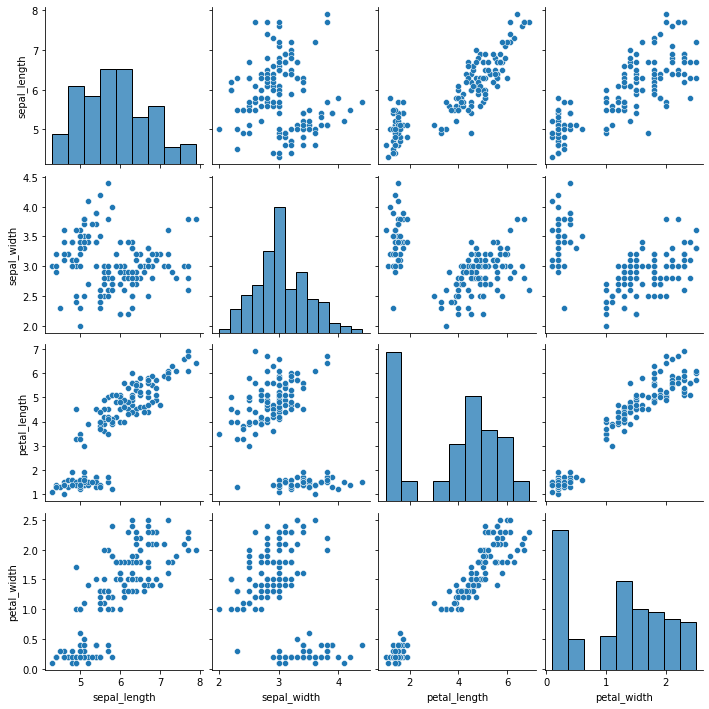

In [85]:
sns.pairplot(data=iris)
plt.show()

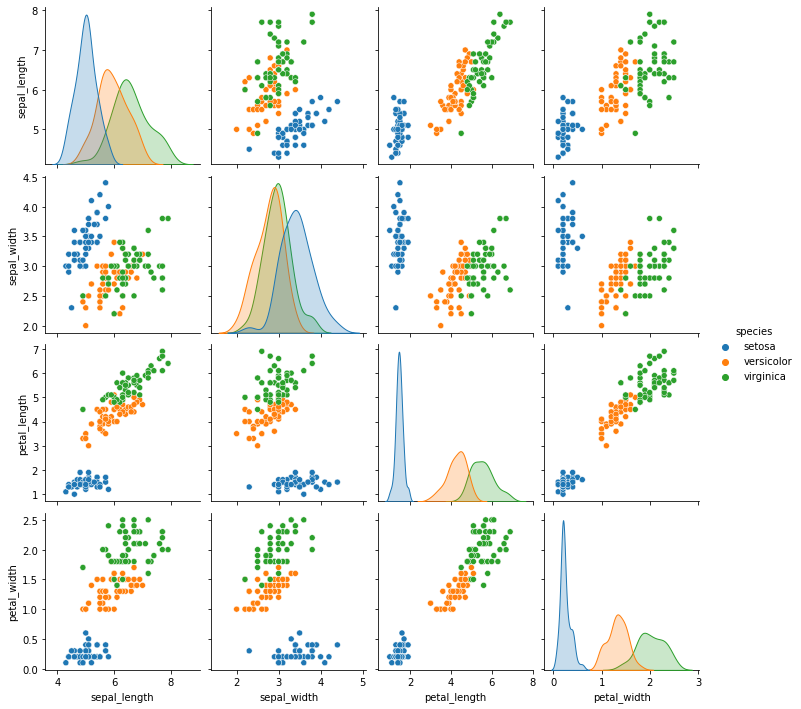

In [86]:
sns.pairplot(data=iris, hue='species')
plt.show()

# Exercise: mpg 데이터 셋

MPG(Mile Per Gallon): 자동차 연비

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot